In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('org_data.xlsx')

In [ ]:
data.head(5)

,ID,Class,Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_UK_DocG_Sanitation,Other,In relation to the installation of new and rep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_UK_DocG_Sanitation,Other,Attention should be paid in particular to the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_UK_DocG_Sanitation,Other,How to use this.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find unnamed columns
remove_unname_columns = [col for col in data.columns if col.startswith('Unnamed')]
data = data.drop(columns=remove_unname_columns)

In [ ]:
data.head(5)

,ID,Class,Text,Other,other
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",Self-contained,NaN
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,NaN,NaN
2,3_UK_DocG_Sanitation,Other,In relation to the installation of new and rep...,NaN,NaN
3,4_UK_DocG_Sanitation,Other,Attention should be paid in particular to the ...,NaN,NaN
4,5_UK_DocG_Sanitation,Other,How to use this.,NaN,NaN


In [ ]:
reomve_col = ['Other','other']
data = data.drop(columns=reomve_col)

In [ ]:
data.head(5)

,ID,Class,Text
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ..."
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.
2,3_UK_DocG_Sanitation,Other,In relation to the installation of new and rep...
3,4_UK_DocG_Sanitation,Other,Attention should be paid in particular to the ...
4,5_UK_DocG_Sanitation,Other,How to use this.


In [ ]:
data.isnull().sum()

ID       140
Class    140
Text     140
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

ID       0
Class    0
Text     0
dtype: int64

In [ ]:
data.columns

Index(['ID', 'Class', 'Text'], dtype='object')

In [ ]:
data['Class'].unique()

array(['Other', 'Self-contained', 'other', 'self-contained',
       'Self-Contained', 'Sel-contained'], dtype=object)

In [ ]:
# Map the classes
data['target_class'] = data['Class'].map({
    "Self-contained": 'self-contained',
    "self-contained": 'self-contained',
    "Self-Contained": 'self-contained',
    "Sel-contained": 'self-contained',
    "Other": 'other',
    "other": 'other'
})

In [ ]:
data['target_class'].unique()

array(['other', 'self-contained'], dtype=object)

In [ ]:
data.tail(7)

,ID,Class,Text,target_class
26123,499_UK_DocM_V2_AccessAndUseOfBuildings,Self-contained,The design solar load should be reduced by at ...,self-contained
26124,350_UK_DocM_V2_AccessAndUseOfBuildings,Self-contained,The effective g-value should be no worse than ...,self-contained
26125,500_UK_DocM_V2_AccessAndUseOfBuildings,Other,Any general lighting system within the area se...,other
26126,501_UK_DocM_V2_AccessAndUseOfBuildings,Other,Appendix E: Hierarchy for establishing seasona...,other
26127,502_UK_DocM_V2_AccessAndUseOfBuildings,Other,E1 When a heating system is being replaced in...,other
26128,503_UK_DocM_V2_AccessAndUseOfBuildings,Other,The seasonal efficiency of the appliance being...,other
26129,504_UK_DocM_V2_AccessAndUseOfBuildings,Other,5) should be made to convert it to an appropri...,other


Text(0.5, 1.0, 'Distribution of Target_class')

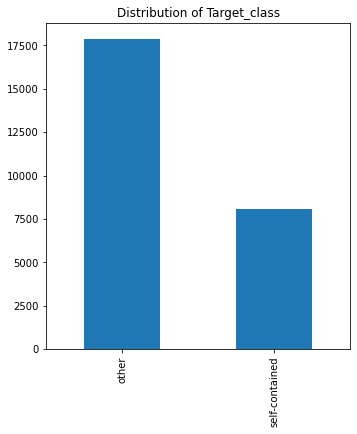

In [ ]:
# Plot the distribution after merging 6 classes into 2 classes
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(121)
data['target_class'].value_counts().plot.bar()
plt.title('Distribution of Target_class')

In [ ]:
data.head(2)

,ID,Class,Text,target_class
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",other
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,other


In [ ]:
from gensim.models import Word2Vec

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
data['token'] = data['Text'].apply(word_tokenize)

In [ ]:
data.head(2)

,ID,Class,Text,target_class,token
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",other,"[However, ,, building, work, may, be, subject,..."
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,other,"[Consideration, of, technical, risk, .]"


In [ ]:
w2v_model = Word2Vec(sentences=data['token'], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
import numpy as np

In [ ]:
# generate vector of text data
def sent_vector(token):
    vector = np.zeros(w2v_model.vector_size)
    no_of_token = 0

    for word in token:
        if word in w2v_model.wv:
            vector +=w2v_model.wv[word]
            no_of_token +=1

    if no_of_token > 0:
        vector /=no_of_token

    return vector

In [ ]:
# here call the above function and create a new column name sent_vect
data['sent_vect']=data['token'].apply(sent_vector)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
data.head(2)

,ID,Class,Text,target_class,token,sent_vect
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",other,"[However, ,, building, work, may, be, subject,...","[-0.4933566468603471, 0.4051052691305385, -0.0..."
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,other,"[Consideration, of, technical, risk, .]","[-0.22891364991664886, 0.5799007922410965, 0.0..."


In [ ]:
x = np.stack(data['sent_vect'].to_numpy())

In [ ]:
y = data['target_class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_Train,Y_Train)

C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_LR_model = LR_model.predict(X_Test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_of_LR_model = accuracy_score(Y_Test, pred_LR_model)

In [ ]:
print('The Accuracy of Logistic Regression Model',acc_of_LR_model)

The Accuracy of Logistic Regression Model 0.8793302540415704


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(X_Train,Y_Train)

RandomForestClassifier()

In [ ]:
predication_RFC = RFC.predict(X_Test)

In [ ]:
accuracy_RFC = accuracy_score(Y_Test,predication_RFC)

In [ ]:
print('the accuracy of Random Forest Classifier',accuracy_RFC)

the accuracy of Random Forest Classifier 0.9890300230946882


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC_model = SVC()

In [ ]:
SVC_model.fit(X_Train,Y_Train)

SVC()

In [ ]:
predication_SVC = SVC_model.predict(X_Test)

In [ ]:
accuracy_svc = accuracy_score(Y_Test,predication_SVC)

In [ ]:
print('The Accuracy of SVC ',accuracy_svc)

The Accuracy of SVC  0.955735180908391
